In [2]:
import pandas as pd
import io
import requests

In [3]:
response = requests.get("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
response.raise_for_status() # Raise an exception for bad status codes
df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknow,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
1,s2,TV Show,Blood & Water,unknow,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknow,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0
3,s4,TV Show,Jailbirds New Orleans,unknow,unknow,unknow,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0
4,s5,TV Show,Kota Factory,unknow,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0


In [ ]:
df.shape


(8807, 12)

In [ ]:
print(df.info(),'\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description   

In [ ]:
df.count()


,0
show_id,8807
type,8807
title,8807
director,6173
cast,7982
country,7976
date_added,8797
release_year,8807
rating,8803
duration,8804


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
null_count=df.isnull().sum()
total_rows=len(df)
null_percentage=(null_count/total_rows)*100
null_percentage_df=pd.DataFrame({'dataset':null_percentage.index,'null_percentage':null_percentage.values})
null_percentage_df=null_percentage_df.sort_values(by='null_percentage', ascending=False)
print(null_percentage_df)


         dataset  null_percentage
3       director        29.908028
5        country         9.435676
4           cast         9.367549
6     date_added         0.113546
8         rating         0.045418
9       duration         0.034064
0        show_id         0.000000
1           type         0.000000
2          title         0.000000
7   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


In [ ]:
columns_to_impute=['director','country','cast','rating','duration']
for column in columns_to_impute:
    df[column].fillna('unknow', inplace=True)

/tmp/ipython-input-1608122490.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('unknow', inplace=True)


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknow,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknow,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknow,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknow,unknow,unknow,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknow,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknow,unknow,unknow,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
#1.What is the ratio of Movies vs TV Shows on Netflix?
type_counts = df['type'].value_counts()
print(type_counts)


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
#2.Which genres are most popular on Netflix globally?
genre_counts=df['listed_in'].str.split(',').explode().value_counts()
print("top 5 most popular genre",genre_counts.head(5))

top 5 most popular genre listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: count, dtype: int64


In [ ]:
#3.Which years saw the highest release of content on Netflix?
highest_release=df['release_year'].value_counts().sort_index(ascending=False)
print(highest_release,"\n")
highest_release.max()

release_year
2021     592
2020     953
2019    1030
2018    1147
2017    1032
        ... 
1945       4
1944       3
1943       3
1942       2
1925       1
Name: count, Length: 74, dtype: int64 



1147

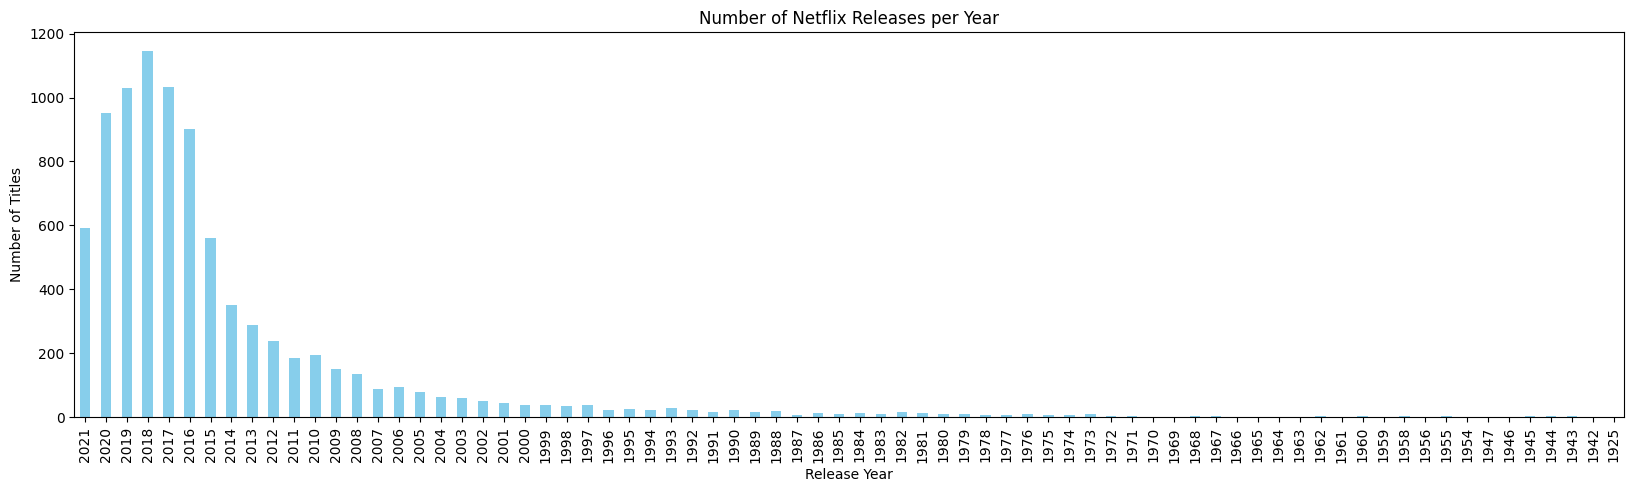

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
highest_release.plot(kind='bar', color='skyblue')
plt.title('Number of Netflix Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


In [ ]:
#4. Which countries produce the most Netflix content?
max_country_realease=df['country'].str.split(',').dropna().explode().value_counts()

max_country_realease.head(20)

,count
country,
United States,3211
India,1008
unknow,831
United Kingdom,628
United States,479
Canada,271
Japan,259
France,212
South Korea,211


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


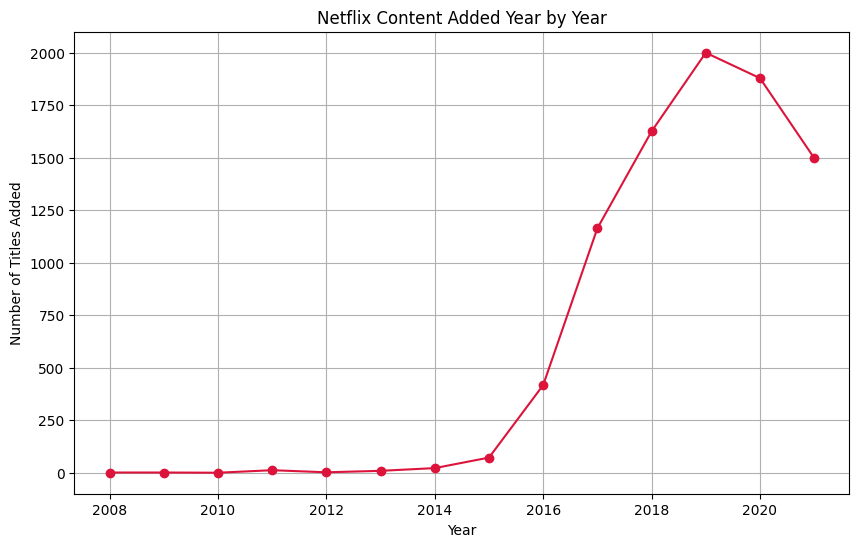

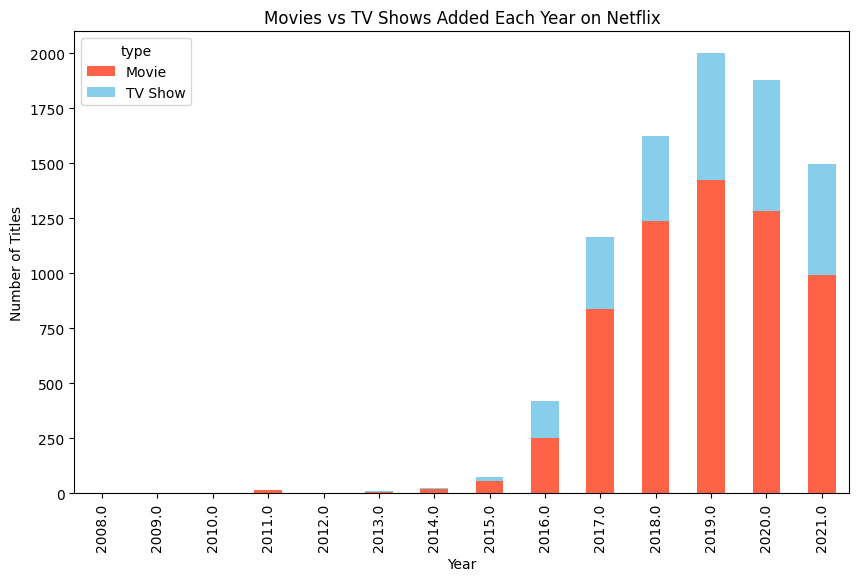

In [5]:
#5. How has the trend of adding new content evolved year by year?
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()
print(year_counts)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
year_counts.plot(kind='line', marker='o', color='crimson')
plt.title('Netflix Content Added Year by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()
type_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

type_year.plot(kind='bar', stacked=True, figsize=(10,6), color=['tomato', 'skyblue'])
plt.title('Movies vs TV Shows Added Each Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()



In [ ]:
#6. Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?
frequent_rating=df['rating'].value_counts()
frequent_rating

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [7]:
#7. Do some countries tend to produce more mature content (TV-MA)?
mature = df[df['rating'] == 'TV-MA']
mature.loc[:,'country'] = mature['country'].dropna().str.split(', ')
mature_countries = mature.explode('country')
mature_counts = mature_countries['country'].value_counts()
print(mature_counts.head(10))



country
United States     1100
India              266
United Kingdom     251
Spain              170
France             163
Canada             107
Mexico             102
Japan              101
South Korea         92
Germany             79
Name: count, dtype: int64


In [8]:
#8. Which genres are more associated with TV Shows vs Movies?
df['genre'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre')
genre_counts = df_exploded.groupby(['genre', 'type']).size().unstack(fill_value=0)
print(genre_counts.head())



type                      Movie  TV Show
genre                                   
Action & Adventure          859        0
Anime Features               71        0
Anime Series                  0      176
British TV Shows              0      253
Children & Family Movies    641        0


In [12]:
#10.What genres are most popular in the last 3 years?
df['year_added'] = df['date_added'].dt.year
recent_df = df[df['year_added'] >= (df['year_added'].max() - 2)]
recent_df.loc[:,'genre'] = recent_df['listed_in'].str.split(', ')
recent_genres = recent_df.explode('genre')
genre_trend = (
    recent_genres['genre']
    .value_counts()
    .head(10)
)
print(genre_trend)


genre
International Movies        1593
Dramas                      1511
Comedies                    1135
International TV Shows       836
Action & Adventure           568
TV Dramas                    463
Children & Family Movies     439
Independent Movies           438
Romantic Movies              437
Documentaries                405
Name: count, dtype: int64


In [13]:
#11.  Who are the top 10 directors with the most Netflix content?
df['director'] = df['director'].str.split(', ')
df_exploded = df.explode('director')
director_counts = (
    df_exploded['director']
    .value_counts()
    .head(10)
)
print(director_counts)



director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64


In [17]:
#12. Which actors appear most frequently in Netflix shows?
df['cast'] = df['cast'].fillna('Unknown').str.split(', ')
df_exploded = df.explode('cast')
actor_counts = (df_exploded['cast'].value_counts().head(10))
print(actor_counts)

cast
Unknown    8807
Name: count, dtype: int64


In [21]:
#13. Which director-genre pairs are most frequent?

df_exploded = df.explode('director').explode('genre')
director_genre_counts = (
    df_exploded.groupby(['director', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=True)
    .head(10)
)
print(director_genre_counts)


   director                  genre  count
60  Unknown      Romantic TV Shows      1
55  Unknown           LGBTQ Movies      1
58  Unknown             Reality TV      1
67  Unknown              TV Horror      1
42  Unknown      Classic & Cult TV      2
66  Unknown              TV Dramas      2
64  Unknown  TV Action & Adventure      2
2   Unknown      Classic & Cult TV      2
34  Unknown           TV Thrillers      3
15  Unknown               Kids' TV      3


In [ ]:
#14. How many titles have unknown directors or cast members?


In [24]:
#15. What is the average duration of Movies on Netflix?
movies = df[df['type'] == 'Movie']
# Extract numbers from duration and convert to integer
movies.loc[:,'duration_min'] = movies['duration'].str.replace(' min', '').astype(float)
average_duration = movies.loc[:,'duration_min'].mean()
print(f"Average movie duration on Netflix: {average_duration:.2f} minutes")


Average movie duration on Netflix: 99.58 minutes


/tmp/ipython-input-2054666297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.loc[:,'duration_min'] = movies['duration'].str.replace(' min', '').astype(float)


In [ ]:
#16.  What’s the most common number of seasons for TV shows?
tv_shows = df[df['type'] == 'TV Show']
tv_shows.loc[:,'seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
most_common_seasons = tv_shows['seasons'].mode()[0]
print("Most common number of seasons for TV shows:", most_common_seasons)


Most common number of seasons for TV shows: 1


/tmp/ipython-input-3400637077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.loc[:,'seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)


In [ ]:
genre_split=df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
genre_type_counts = genre_split.groupby(['type', 'genre']).size().unstack(fill_value=0)



In [ ]:
genre_type_counts.loc['Movie'].sort_values(ascending=False).head(10)


,Movie
genre,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
Independent Movies,736
Romantic Movies,613
Children & Family Movies,605


In [ ]:
genre_country = df.dropna(subset=['country', 'listed_in']).assign(
    country=df['country'].str.split(', '),
    genre=df['listed_in'].str.split(', ')
).explode('country').explode('genre')


In [ ]:
genre_country_counts = genre_country.groupby(['genre', 'country']).size().reset_index(name='count')


In [ ]:
top_countries_per_genre = genre_country_counts.loc[
    genre_country_counts.groupby('genre')['count'].idxmax()
].sort_values('count', ascending=False)
print(top_countries_per_genre)


                             genre         country  count
683           International Movies           India    864
501                         Dramas   United States    835
232                       Comedies   United States    680
372                  Documentaries   United States    511
57              Action & Adventure   United States    404
139       Children & Family Movies   United States    390
643             Independent Movies   United States    390
1459                     Thrillers   United States    292
1240                   TV Comedies   United States    258
1301                     TV Dramas   United States    232
90                British TV Shows  United Kingdom    225
994                Romantic Movies   United States    225
813         International TV Shows          unknow    223
1159               Stand-Up Comedy   United States    216
842                       Kids' TV   United States    214
574                  Horror Movies   United States    201
406           

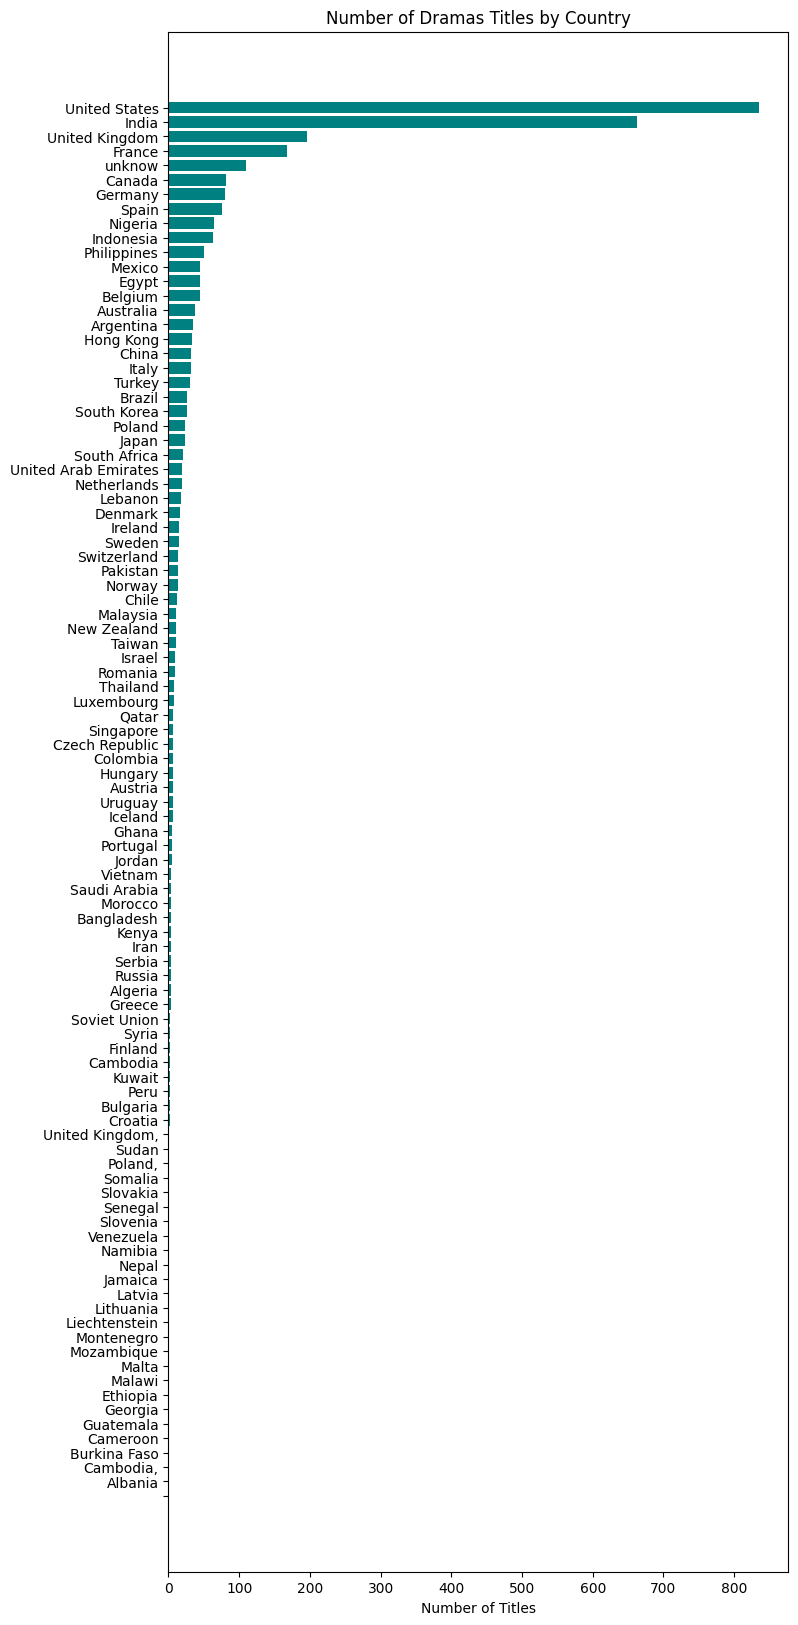

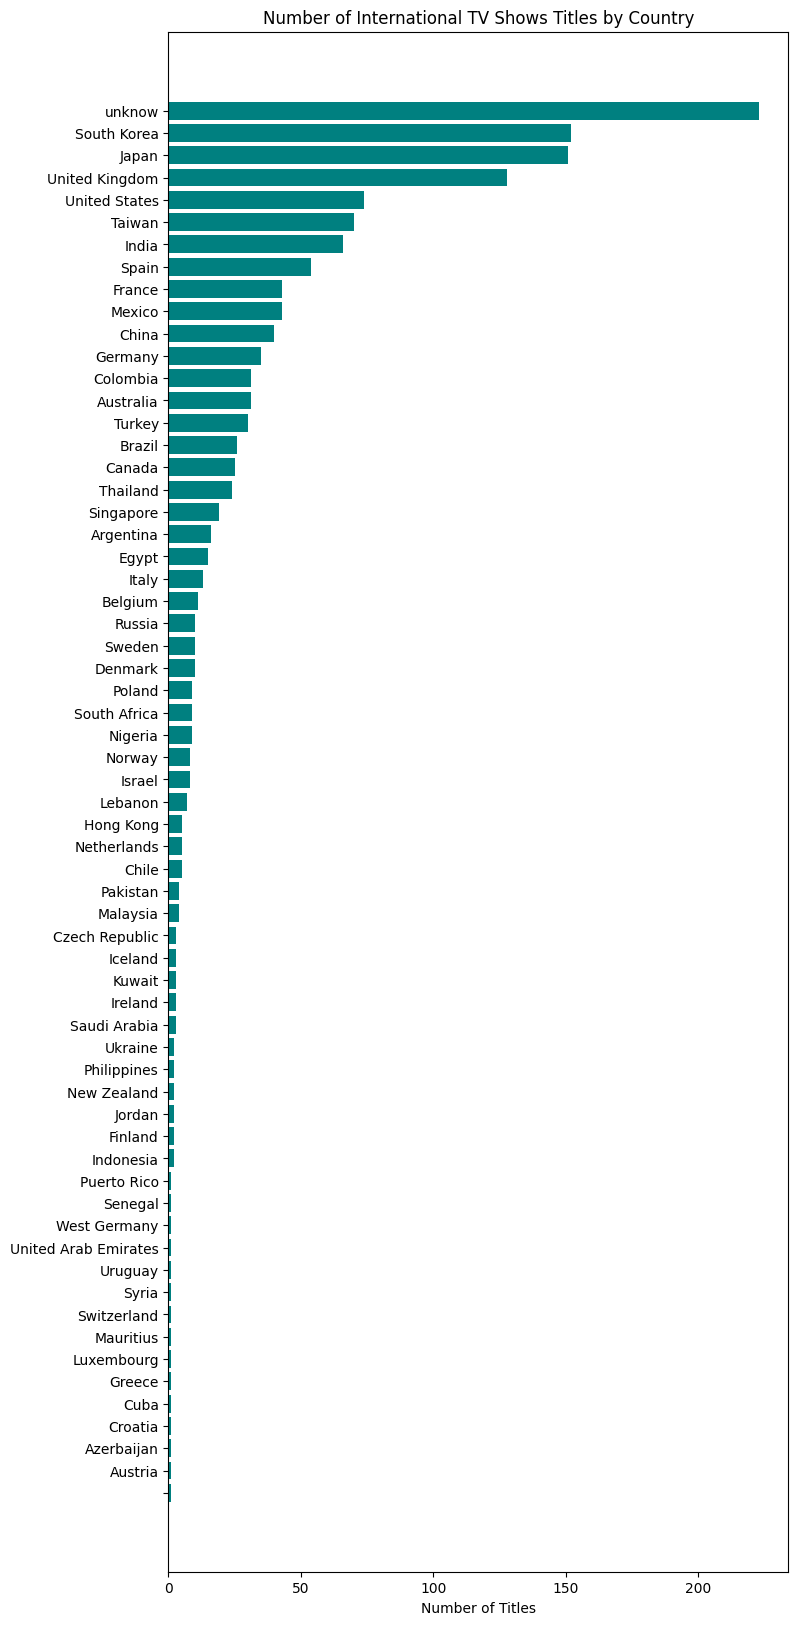

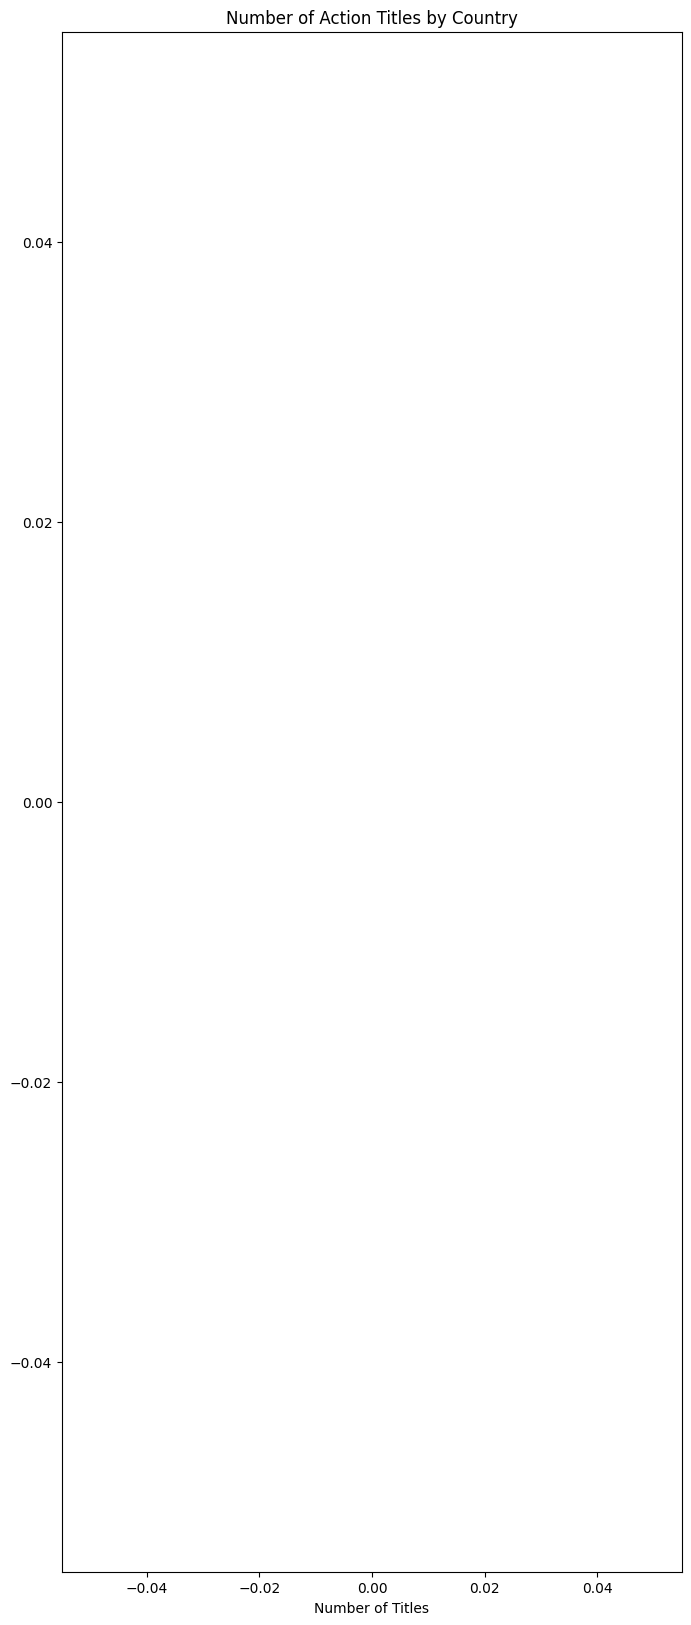

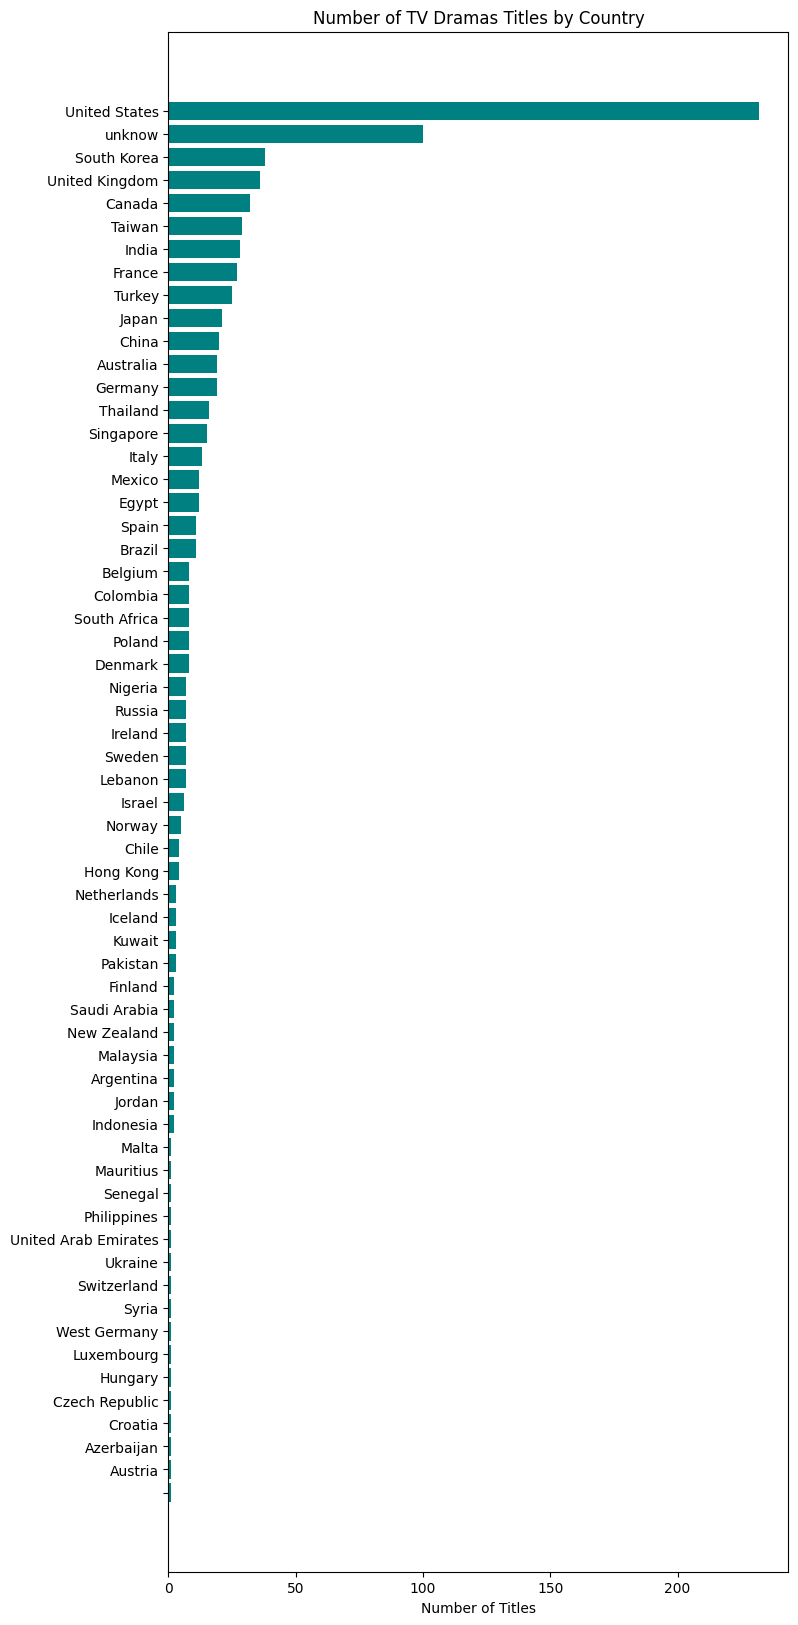

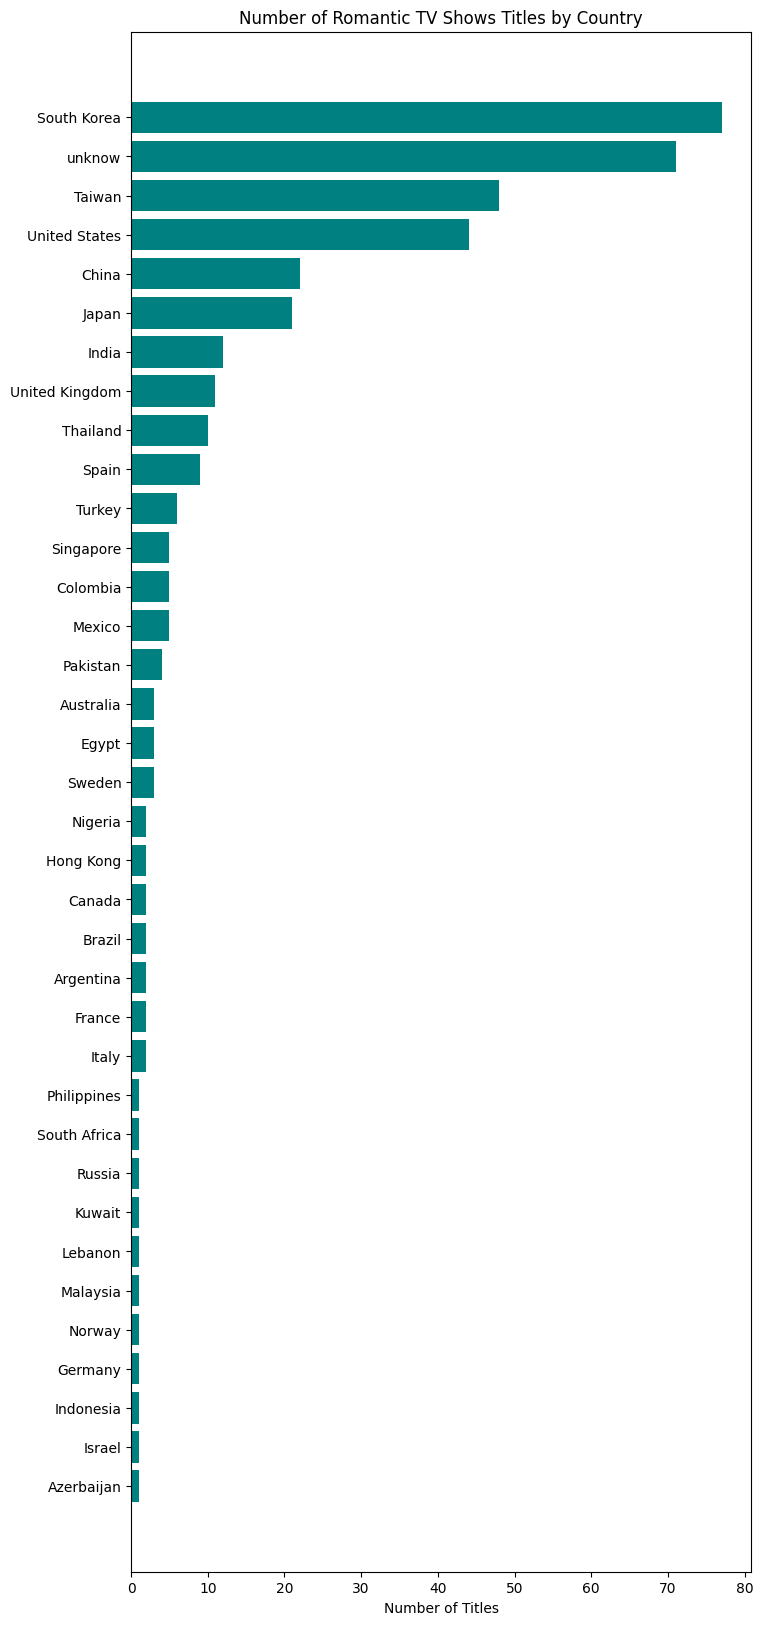

In [ ]:
import matplotlib.pyplot as plt

# Pick top 5 genres to visualize
top_genres = ['Dramas', 'International TV Shows', 'Action', 'TV Dramas', 'Romantic TV Shows']

for genre in top_genres:
    data = genre_country_counts[genre_country_counts['genre'] == genre].sort_values('count', ascending=True)
    plt.figure(figsize=(8,20))
    plt.barh(data['country'], data['count'], color='teal')
    plt.title(f'Number of {genre} Titles by Country')
    plt.xlabel('Number of Titles')
    plt.show()


In [25]:
#18.In which months does Netflix add the most content?
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
month_counts = df['month_added'].value_counts().sort_index()
print(month_counts)


month_added
1.0     727
2.0     557
3.0     734
4.0     759
5.0     626
6.0     724
7.0     819
8.0     749
9.0     765
10.0    755
11.0    697
12.0    797
Name: count, dtype: int64


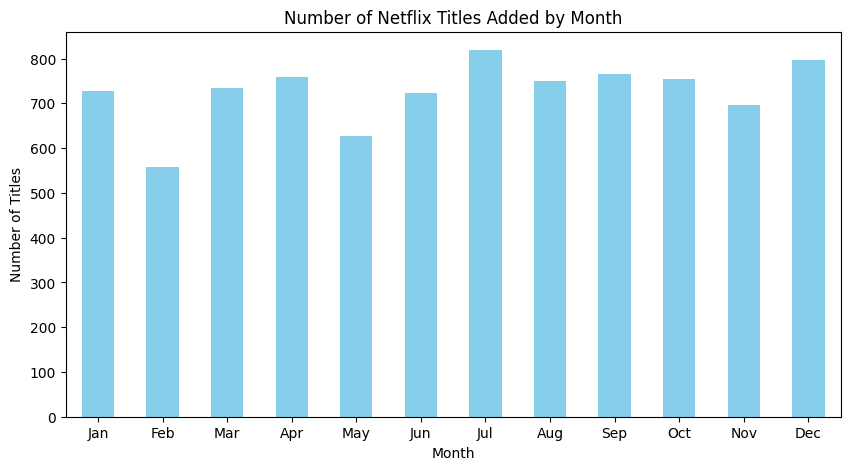

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
month_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Netflix Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.show()
